In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [ ]:
os.chdir(os.path.expanduser('~/git/mf-copula/'))

In [3]:
def load_experiment(experiment_dir):
    return [
        pd.read_csv(os.path.join(experiment_dir, synthetic_dir, csv))
        for synthetic_dir in os.listdir(experiment_dir)
        if len(os.listdir(os.path.join(experiment_dir, synthetic_dir))) > 1
        for csv in os.listdir(os.path.join(experiment_dir, synthetic_dir))
        if csv != 'original.csv'    
    ]

In [4]:
pprint = lambda x: f'{x[0]:7.2f}\t{x[1]:7.2f}\t{np.sqrt(x[1])/x[0]:7.2f}'

In [ ]:
obstacles_df = pd.read_csv('./NBH/preprocessed/human/obstacles.csv')
obstacles_row = obstacles_df.iloc[11].drop('Unnamed: 0')
for i in range(1, 8):
    obstacles_row.drop(f'O{i}ypos')

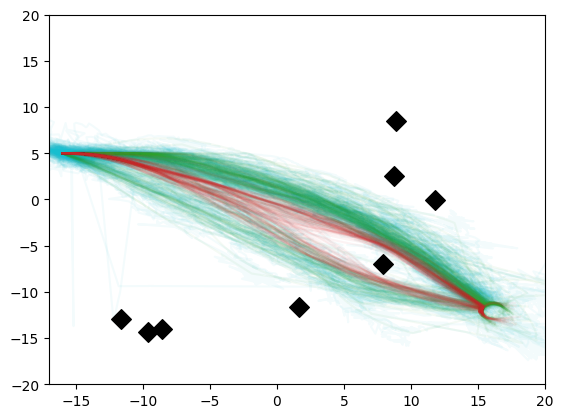

In [ ]:
human_directory = './NBH/preprocessed/human/map-16_5_16_-12_obs11/'
raycast_directory = './NBH/preprocessed/raycast/map-16_5_16_-12_obs12'
Q = load_experiment('./synthetic/output/NBH-human-obs-mf-ban10-chol2-5-offset')

ax = plt.subplot()
ax.set_xlim(-17, 20)
ax.set_ylim(-20, 20)

for file in os.listdir(human_directory):
    path = pd.read_csv(os.path.join(human_directory, file))
    ax.plot(path.x, path.y, c='C2', alpha=0.05, zorder=1)

for file in os.listdir(raycast_directory):
    path = pd.read_csv(os.path.join(raycast_directory, file))
    ax.plot(path.x, path.y, c='C3', alpha=0.05, zorder=2)

for Q_i in Q:
    ax.plot(Q_i.x, Q_i.y, c='C9', alpha=0.05, zorder=0)

for i in range(1, 9):
    ax.scatter(obstacles_row[f'O{i}xpos'], obstacles_row[f'O{i}zpos'], s=100, c='black', alpha=1, marker='D', zorder=5)

plt.show()

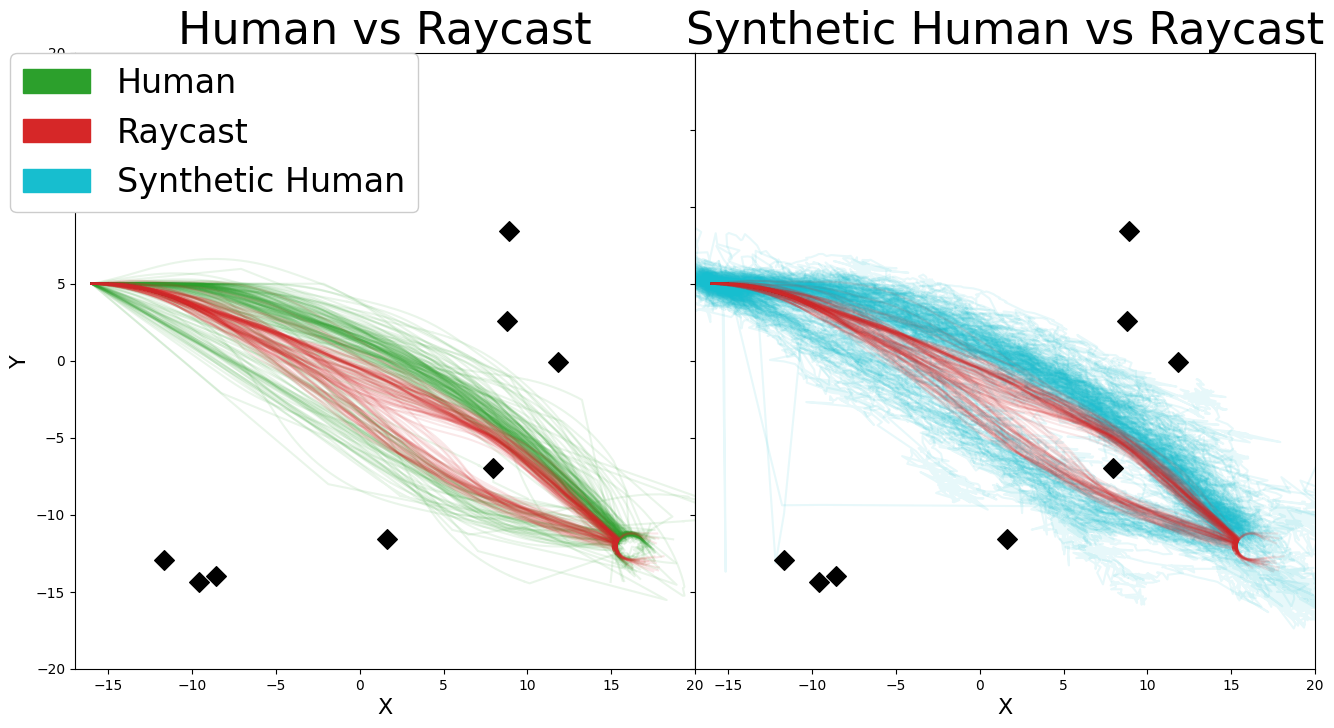

In [ ]:
human_directory = './NBH/preprocessed/human/map-16_5_16_-12_obs11/'
raycast_directory = './NBH/preprocessed/raycast/map-16_5_16_-12_obs12'
Q = load_experiment('./synthetic/output/NBH-human-obs-mf-ban10-chol2-5-offset')
NUM_PATHS = np.inf

ax = plt.subplots(ncols=2, figsize=(16,8), sharey=True)[1]
plt.subplots_adjust(wspace=0, hspace=0)

### PLOT 0 ###
for i, file in enumerate(os.listdir(human_directory)):
    if i > NUM_PATHS:
        break
    path = pd.read_csv(os.path.join(human_directory, file))
    ax[0].plot(path.x, path.y, c='C2', alpha=0.1, zorder=0)

for i, file in enumerate(os.listdir(raycast_directory)):
    if i > NUM_PATHS:
        break
    path = pd.read_csv(os.path.join(raycast_directory, file))
    ax[0].plot(path.x, path.y, c='C3', alpha=0.1, zorder=1)

for i in range(1, 9):
    ax[0].scatter(obstacles_row[f'O{i}xpos'], obstacles_row[f'O{i}zpos'], s=100, c='black', alpha=1, marker='D', zorder=5)



### PLOT 1 ###
for i, file in enumerate(os.listdir(raycast_directory)):
    if i > NUM_PATHS:
        break
    path = pd.read_csv(os.path.join(raycast_directory, file))
    ax[1].plot(path.x, path.y, c='C3', alpha=0.1, zorder=1)

for i, Q_i in enumerate(Q):
    if i > NUM_PATHS:
        break
    ax[1].plot(Q_i.x, Q_i.y, c='C9', alpha=0.1, zorder=0)

for i in range(1, 9):
    ax[1].scatter(obstacles_row[f'O{i}xpos'], obstacles_row[f'O{i}zpos'], s=100, c='black', alpha=1, marker='D', zorder=5)



ax[0].set_title('Human vs Raycast', fontsize=32)
ax[1].set_title('Synthetic Human vs Raycast', fontsize=32)
ax[0].set_ylabel('Y', fontsize=16)

for ax_i in ax:
    ax_i.set_xlim(-17, 20)
    ax_i.set_ylim(-20, 20)
    ax_i.set_xlabel('X', fontsize=16)

patch1 = mpatches.Patch(color='C9', label='Synthetic Human')
patch2 = mpatches.Patch(color='C3', label='Raycast')
patch3 = mpatches.Patch(color='C2', label='Human')


fig = plt.gcf()
fig.legend(handles=[patch3, patch2, patch1], ncol=1, bbox_to_anchor=(0.35, 0.9), fontsize=24, framealpha=1)
# fig.savefig('./img/NBH-experiments.pdf', dpi=300, format='pdf', bbox_inches='tight')

plt.show()